# Video Game Sales Model
### Goals
This project aims to answer 2 questions

* Rather the population size of a region has a relation to carbon emissions.
* Was there a significant effect on carbon emissions based on year and state

### Project Members:
* [Laurent Mundell](https://github.com/LaurentStar)
* [Joe Hart](https://github.com/joseh4)


### Table of Contents
    -Imports
    -Data Sources
    -Load Data
    -Methods/Globals/Constants
    -Data Clean
    -Data Prep
    -Modeling
    -Hypothesis Test I
    -Hypothesis Test II

# Imports

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Sources
* [Video Game Sales with Ratings](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings)
* [Google Trends work around](https://www.quora.com/How-can-I-see-absolute-search-number-volume-on-Google-Trends)
https://www.scikit-yb.org/en/latest/api/regressor/residuals.html
* [R-Square Citation](https://stats.stackexchange.com/questions/334004/can-r2-be-greater-than-1)

# Load Data

In [2]:
_  = os.path.join('data', 'Video_Games_Sales_as_at_22_Dec_2016.csv')
video_game_df = pd.read_csv(_)

# Methods/Globals/Constants

In [3]:
%run -i "scripts//methods_globals_constants.py"

# Data Clean

In [121]:
%run -i "scripts//data_clean.py"

# Data Prep

In [148]:
%run -i "scripts//data_prep.py"

# Modeling

------------------------------------------------------BaseLine Model, Simple linear regression------------------------------------------------------


Train Mean Squarred Error: 1.3811558258079595
Test Mean Squarred Error: 6.2577477200669096e+16

Train r2 score: 0.35766427848130755
Test r2 score: -2.953961503229399e+16

Train Adjusted r2 score: 0.3552405567537227
Test Adjusted r2 score: -2.965107669382044e+16



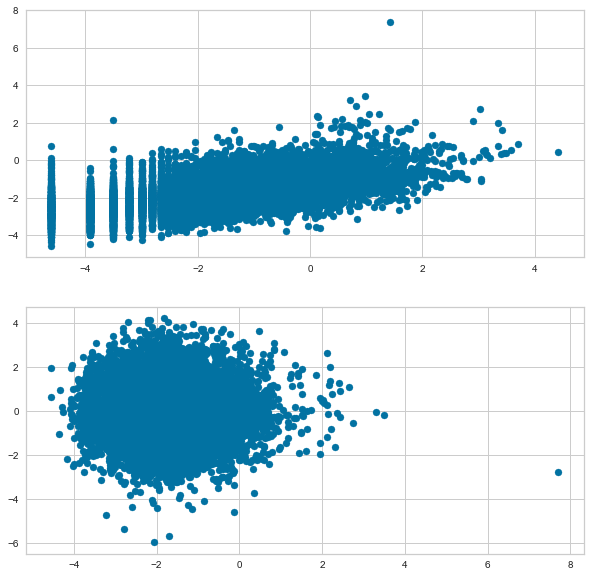

In [150]:
%run -i "scripts//base_line_model.py"

------------------------------------------------------2nd Model, Random Forest------------------------------------------------------


Train Mean Squarred Error: 1.4936018391058363
Test Mean Squarred Error: 1.4078278288855315

Train Mean Absolute Error: 0.9659069497140745
Test Mean Absolute Error: 0.936149179493487




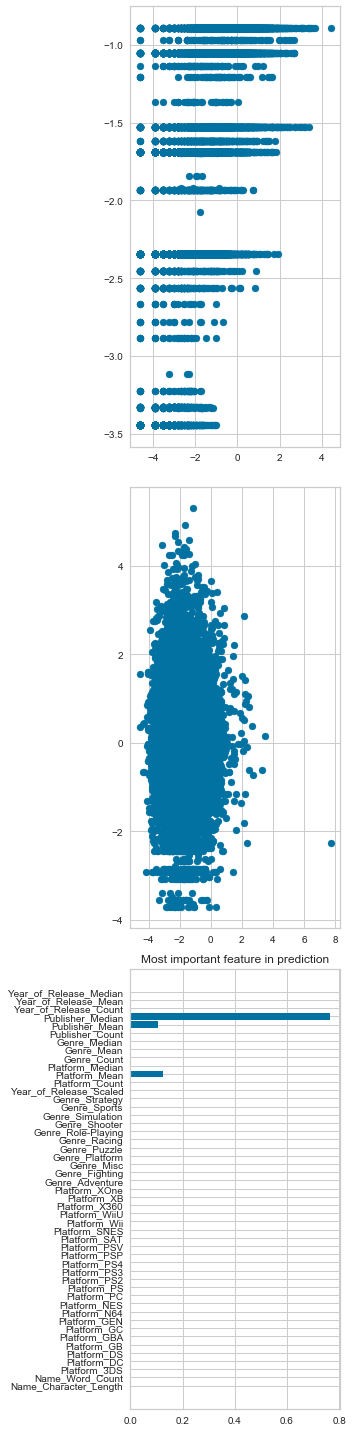

In [167]:
%run -i "scripts//random_forest_model.py"

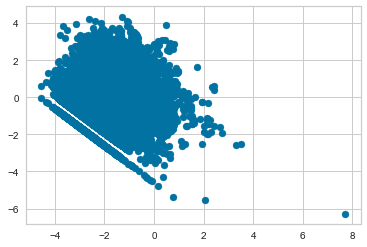

In [103]:
plt.scatter(y_train, y_pred);
plt.scatter(y_pred, res);

# Interactions

In [ ]:
list(enumerate(X_train.columns))

In [17]:
target = 'Adventure'
interact = X_train.columns[19:27]
adventure_IN_platoform_df = build_interaction(X_train.copy(), target, interact)

In [19]:
action_platform_inter = LinearRegression()
action_platform_inter.fit(adventure_IN_platoform_df, y_train)
y_pred = action_platform_inter.predict(adventure_IN_platoform_df)
res = y_train - y_pred 

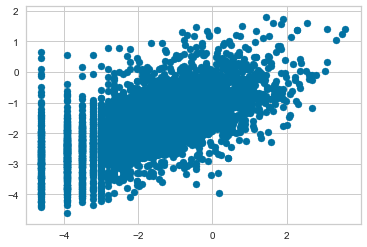

In [20]:
plt.scatter(y_train, y_pred);

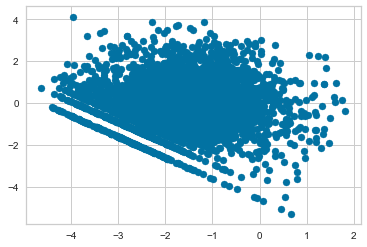

In [21]:
plt.scatter(y_pred, res);

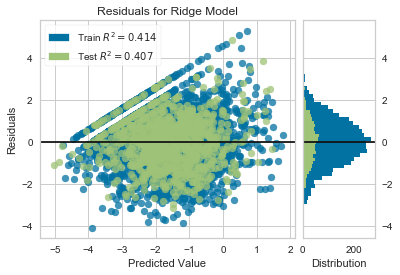

In [25]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# Cleaned Data Exploratory Visual

In [ ]:
"""
By the year 2000 there was no signicant online present for metacritic. Below games released before 1995 were removed.
"""
print('Dataframe with filled nan values')
sns.pairplot(video_game_null_fill_df);

In [ ]:
"""
Critic score and count are strongly correlated suggesting the number of critque averages out the game's score
"""
fig, ax = plt.subplots(figsize=(15,8))  
sns.heatmap(video_game_null_fill_df.corr(), annot=True, ax=ax);

In [ ]:
"""
The User scores and critic score are on different scales being 0-10 and 0-100 respectfully. 
Dispite this the distrubtions do look normal so critics and users may review the same way
"""
fig, ax = plt.subplots(figsize=(15,8))  

ax.hist(video_game_null_fill_df['Critic_Score'])
ax.hist(video_game_null_fill_df['User_Score']);

In [ ]:
"""
The critics total of reviews per game is so small compared to count of user reviews,
the critics histogram doesn't appear at all. One thing about them is their skewness to the left. 
Both have the same form of skewness where for a particular game there are way more than normal
"""

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8))  

ax[0].hist(video_game_null_fill_df['Critic_Count'])
ax[0].hist(video_game_null_fill_df['User_Count'])

ax[1].hist(video_game_null_fill_df['Critic_Count']);;

In [ ]:
"""
Oh no..... What 
"""

fig, ax = plt.subplots(figsize=(15,8))  

ax.bar(x = video_game_null_fill_df['Year_of_Release'], height = video_game_null_fill_df['Critic_Count']);

In [ ]:
video_game_null_fill_df[video_game_null_fill_df['Year_of_Release'] == 2020]

# Scaling/Normalizing Data

In [ ]:
video_game_df[feat].map(lambda x: np.log(x))

In [ ]:
# Min-Max scaling User score and Critic score for interpretation

_ = video_game_null_fill_df['Critic_Score']
video_game_null_fill_df['Critic_Score'] = (_-min(_))/(max(_)-min(_))
video_game_null_fill_df['User_Score'] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
boston_features['DIS'] = (logdis-min(logdis))/(max(logdis)-min(logdis))



data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
>>> scaler = MinMaxScaler()
>>> print(scaler.fit(data))
MinMaxScaler()
>>> print(scaler.data_max_)
[ 1. 18.]
>>> print(scaler.transform(data))
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
>>> print(scaler.transform([[2, 2]]))
[[1.5 0. ]]

# [Video Game]
#### Data World 
    *https://data.world/craigkelly/steam-game-data
    [Shareholder] They are a publisher, they want buy a new team but want to make sure they make good choice
        [Question1] Can we build a predict/regression model to predict a potential interval for steamspyowners? 
        [Question2] Metacritic scores are from 0 -100. Could we build a classifer model?
#### Kaggle
	*https://www.kaggle.com/gregorut/videogamesales
	*https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
	*https://www.kaggle.com/kendallgillies/video-game-sales-and-ratings
     [Shareholder] They are a publisher is looking for recommendations for what types of game to make
         [Question1] Can we pridict Global_Sales


# [Animals]
##### Kaggle 
    *https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and
    [Shareholder] ?????
    
    [Not Enough]https://www.kaggle.com/mbogernetto/brazilian-amazon-rainforest-degradation
    [Not independent]https://www.kaggle.com/se18m502/bee-hive-metrics#weight_2017.csv
    [Not independent]https://www.kaggle.com/hocop1/cat-and-dog-breeds-parameters
    [Not independent]https://www.kaggle.com/jessicali9530/honey-production
    
# [Medical]
##### Kaggle
    [Not independent]https://www.kaggle.com/de5d5fe61fcaa6ad7a66/coronavirus-dataset-update-0206

# [Vehicle]
##### Data World
    https://data.world/nhtsa/nhtsas-odi-recalls/workspace/project-summary?agentid=nhtsa&datasetid=nhtsas-odi-recalls

##### Kaggle
    https://www.kaggle.com/austinreese/craigslist-carstrucks-data
    [ShareHolder] A small start up want to build an app to help people buy better cars off craiglist. 
        [Question1] Can we classify the cars by title_status?
        [Question2] Can we predict the odometer for the car?
        [Question3] Can we classify condition
        
    *https://www.kaggle.com/mirosval/personal-cars-classifieds
    [ShareHolder] Find cars for people app
        [Question]The user get an estimate of price_eur based on car details
        
# [Misc]
##### Buzzfeed
    *https://github.com/BuzzFeedNews/2014-06-firework-injuries
    [Shareholder] We're an evil insurance company, which collection of people should we raise the price? 
    [Question]
    
    *https://www.kaggle.com/rusiano/snooker-data-19822020#players_r.csv

In [ ]:
# #Fill all nan value with the average by genre
# video_game_null_fill_df = video_game_null_fill_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_CRITIC_SCORE_AVG, 3, 10),  axis=1)


# video_game_null_fill_df = video_game_null_fill_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_CRITIC_COUNT_AVG, 3, 11),  axis=1)
# video_game_null_fill_df = video_game_null_fill_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_USER_SCORE_AVG, 3, 12),  axis=1)
# video_game_null_fill_df = video_game_null_fill_df.apply(lambda x : fillna_average_by_target_column(x, GENRE_CRITIC_COUNT_AVG, 3, 13),  axis=1)

# #Drop all related sales columns
# video_game_null_fill_df.drop(columns=['EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], inplace=True)

# #Drop all release year Nan  rows Appoximity ~ 300 rows
# #video_game_null_fill_df.dropna(subset=['Year_of_Release', 'Genre'], inplace=True)

# # Make release a simple int type to represent it more accuracly 
# video_game_null_fill_df['Year_of_Release'] = video_game_null_fill_df['Year_of_Release'].astype(int)

# # Convert user score to float to represent accurately
# video_game_null_fill_df['User_Score'] = video_game_null_fill_df['User_Score'].astype(float)

# # Drop all observation below the year 1990
# video_game_null_fill_df = video_game_null_fill_df[video_game_null_fill_df['Year_of_Release'] > 1995]